In [45]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F

In [48]:
train = datasets.MNIST('', train=True, download=True,
                        transform=transforms.Compose([
                            transforms.ToTensor()
                        ]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/Users/piroova/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370249289/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [49]:
test = datasets.MNIST('', train=False, download=True,
                        transform=transforms.Compose([
                            transforms.ToTensor()
                        ]))  

In [50]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False) 

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(28*28, 64)
        self.fc2=nn.Linear(64, 64)
        self.fc3=nn.Linear(64, 64)
        self.fc4=nn.Linear(64, 10)  # 10 classes
        
    
    def forward(self, x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=F.relu(self.fc3(x))
        x=self.fc4(x)
        
        return F.log_softmax(x,dim=1)

In [21]:
net=Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [22]:
X=torch.rand(28*28)

In [27]:
X=X.view([1,28*28])
output=net(X)

In [28]:
output

tensor([[-2.3846, -2.2561, -2.1436, -2.3961, -2.4468, -2.4032, -2.3838, -2.1586,
         -2.2187, -2.2890]], grad_fn=<LogSoftmaxBackward>)

In [29]:
import torch.optim as optim

In [36]:
optimizer=optim.Adam(net.parameters(),lr=0.001  ) #1e-3
EPOCHS=3

In [56]:
for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featureset and lables
        X,y=data
        net.zero_grad() # set gradian to zero
        output=net(X.view(-1,28*28))
        loss=F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0383, grad_fn=<NllLossBackward>)
tensor(0.0067, grad_fn=<NllLossBackward>)
tensor(0.0067, grad_fn=<NllLossBackward>)


In [58]:
# to know how god network is
correct = 0
total=0

with torch.no_grad():
    # net.train() ... net.eval()
    for data in trainset:
        X,y=data
        output=net(X.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct+=1
            total +=1
print("Accuracy: ",round(correct/total,3))

Accuracy:  0.974


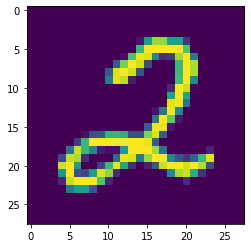

In [60]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [61]:
print(torch.argmax(net(X[0].view(-1,784))))

tensor(2)
